In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open('LR/7.txt')
line = [line.strip() for line in file]
file.close()

In [3]:
num_of_features = int(line[0])
num_of_train = int(line[1])
num_of_test = int(line[num_of_train + 2])

In [4]:
data_train = pd.read_table('LR/7.txt', sep='\s+', skiprows = 2, header=None, nrows = num_of_train)
data_test = pd.read_table('LR/7.txt', sep='\s+', skiprows = 3 + num_of_train, header=None)

In [5]:
X_test = data_test.iloc[:,:-1].values
X_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1:].values
y_test = data_test.iloc[:,-1:].values

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.arange(1, 100, 1)}
ridge = Ridge()
clf = GridSearchCV(ridge, param_grid, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
clf.fit(X_train, y_train)
param = clf.best_params_
param

{'alpha': 98}

In [17]:
alpha = 100
NRMSE_train = np.array([])
NRMSE_test = np.array([])
for i in range(1, alpha):
    clf = Ridge(alpha=i)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    NRMSE_train = np.append(np.sqrt(mean_squared_error(y_train, y_train_pred))/abs(np.mean(y_train)), NRMSE_train)
    NRMSE_test = np.append(np.sqrt(mean_squared_error(y_test, y_test_pred))/abs(np.mean(y_test)), NRMSE_test)
#print(NRMSE_train, NRMSE_test)

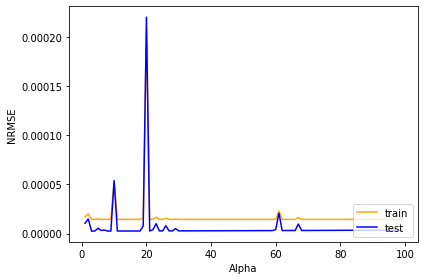

<Figure size 7200x4800 with 0 Axes>

In [18]:
plt.plot(range(1, alpha), NRMSE_train, label = 'train', c = 'orange')
plt.plot(range(1, alpha), NRMSE_test, label = 'test', c = 'b')
plt.ylabel('NRMSE')
plt.xlabel("Alpha")
plt.legend(loc='lower right')
plt.tight_layout()
plt.figure(dpi=1200)
plt.show()

In [28]:
clf = Ridge(alpha=98)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print('NRMSE for train:', np.sqrt(mean_squared_error(y_train, y_train_pred))/abs(np.mean(y_train)))
print('NRMSE for test:', np.sqrt(mean_squared_error(y_test, y_test_pred))/abs(np.mean(y_test)))

NRMSE for train: 2.0001017935979583e-05
NRMSE for test: 1.4825537948800173e-05
